In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json
import os

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [3]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [4]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [5]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [6]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.2227 - accuracy: 0.9348 - val_loss: 0.0883 - val_accuracy: 0.9766
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0871 - accuracy: 0.9733 - val_loss: 0.0539 - val_accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0611 - accuracy: 0.9813 - val_loss: 0.0367 - val_accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0453 - accuracy: 0.9864 - val_loss: 0.0315 - val_accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0280 - val_accuracy: 0.9928


In [7]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0525 - accuracy: 0.9834


[0.05249230936169624, 0.9833999872207642]

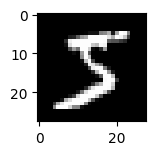

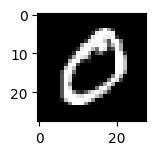

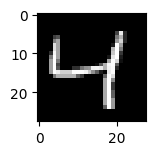

In [8]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [9]:
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

INFO:tensorflow:Assets written to: lenet_5_model\assets


INFO:tensorflow:Assets written to: lenet_5_model\assets


['assets', 'keras_metadata.pb', 'saved_model.pb', 'variables']


In [10]:
lenet_5_model.save("my.h5")

In [11]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [22]:
ckpt = tf.train.Checkpoint(model=lenet_5_model)

In [12]:
json_model = lenet_5_model.to_json()


In [23]:
ckpt.save(file_prefix="weights")

'weights-1'

In [25]:
ckpt.save(file_prefix="weights", options='tf.train.Checkpoint.Format.BINARY')

AttributeError: 'str' object has no attribute 'experimental_enable_async_checkpoint'

In [13]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [14]:
lenet_5_model.save_weights('weights.ckpt')

In [15]:
# 从 checkpoint 文件加载模型权重
lenet_5_model.load_weights('weights.ckpt')

# 获取所有权重张量的名称
weights = lenet_5_model.weights
weight_names = [weight.name for weight in weights]

In [16]:
weights

[<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 6) dtype=float32, numpy=
 array([[[[-0.17677288, -0.10921274, -0.15609926,  0.03247928,
            0.34055483, -0.2703137 ]],
 
         [[ 0.004232  ,  0.00610211, -0.1781902 ,  0.05771052,
            0.43934068, -0.00511643]],
 
         [[ 0.2724311 ,  0.18561174, -0.25380275,  0.06364666,
            0.3033185 ,  0.27767712]],
 
         [[ 0.29368713,  0.25290108, -0.22573078,  0.29018977,
            0.19587277,  0.46380758]],
 
         [[ 0.23007998,  0.3159453 , -0.19296125,  0.34255853,
           -0.07667477,  0.31314597]]],
 
 
        [[[ 0.00443434, -0.2764881 , -0.40048715,  0.15493181,
            0.3140753 , -0.17219238]],
 
         [[ 0.06433327, -0.21251029, -0.07486624,  0.34991392,
            0.29158202,  0.03271443]],
 
         [[ 0.42875502,  0.21320513, -0.19064397,  0.20902725,
            0.21087246,  0.40052408]],
 
         [[ 0.61221   ,  0.1179068 , -0.14206386,  0.04253705,
            0.1747878 ,  0.40

In [17]:
weight_names

['conv2d/kernel:0',
 'conv2d/bias:0',
 'conv2d_1/kernel:0',
 'conv2d_1/bias:0',
 'dense/kernel:0',
 'dense/bias:0',
 'dense_1/kernel:0',
 'dense_1/bias:0',
 'dense_2/kernel:0',
 'dense_2/bias:0']

In [29]:
str1 = ['conv2d_kernel',
'pool1',
 'conv2d_1_kernel',
'pool2',
 'flatten',   
 'dense_kernel',

 'dense_1_kernel',

 'dense_2_kernel',
]

In [31]:
# 使用 Python 的 open 函数创建一个 txt 文件
for i in range(len(lenet_5_model.layers)):
    
    filename = str1[i] + '.bin'
    
    with open(filename, 'w') as f:
   
        weight_value = lenet_5_model.layers[i].get_weights()
        #byte_weight = np.array(weight_value)
        #byte_weight = byte_weight.tobytes()
        # 将权重张量的名称和值写入文件

        f.write(str(byte_weight))

In [ ]:
len(lenet_5_model.layers)

In [22]:
lenet_5_model.layers

In [20]:
lenet_5_model.layers[0].get_weights()

[array([[[[-0.17677288, -0.10921274, -0.15609926,  0.03247928,
            0.34055483, -0.2703137 ]],
 
         [[ 0.004232  ,  0.00610211, -0.1781902 ,  0.05771052,
            0.43934068, -0.00511643]],
 
         [[ 0.2724311 ,  0.18561174, -0.25380275,  0.06364666,
            0.3033185 ,  0.27767712]],
 
         [[ 0.29368713,  0.25290108, -0.22573078,  0.29018977,
            0.19587277,  0.46380758]],
 
         [[ 0.23007998,  0.3159453 , -0.19296125,  0.34255853,
           -0.07667477,  0.31314597]]],
 
 
        [[[ 0.00443434, -0.2764881 , -0.40048715,  0.15493181,
            0.3140753 , -0.17219238]],
 
         [[ 0.06433327, -0.21251029, -0.07486624,  0.34991392,
            0.29158202,  0.03271443]],
 
         [[ 0.42875502,  0.21320513, -0.19064397,  0.20902725,
            0.21087246,  0.40052408]],
 
         [[ 0.61221   ,  0.1179068 , -0.14206386,  0.04253705,
            0.1747878 ,  0.40371832]],
 
         [[ 0.21638371,  0.13053747, -0.38634035,  0.182969  